In [1]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
engine = create_engine('sqlite:///hawaii.sqlite')
conn = engine.connect()

In [2]:
from sqlalchemy.orm import sessionmaker
Session = sessionmaker(bind=engine)
session = Session()

In [3]:
from sqlalchemy.ext.declarative import declarative_base
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
first_row = session.query(Measurement).first()
first_row = session.query(Station).first()

In [52]:

measure = pd.read_sql("SELECT date, prcp FROM measurement ORDER BY date DESC", conn)

In [53]:
measure.head()

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [16]:
measure = pd.read_sql("SELECT date, prcp FROM measurement WHERE date BETWEEN '2016-08-23' and '2017-08-23'", conn)
measure.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [54]:
measure.set_index('date').head()

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


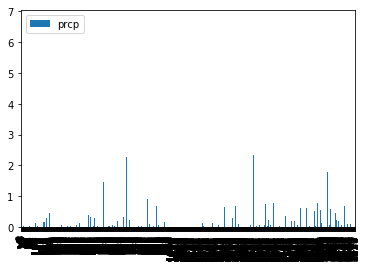

In [23]:
#PART 1 DONE: PLOT PRECIPTATION ANALYSIS
import matplotlib.pyplot as plt

measure.plot.bar()
plt.show()

In [24]:
measure.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [27]:
station = pd.read_sql("SELECT * FROM station", conn)
station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [29]:
#Query to find total number of stations
station = pd.read_sql("SELECT * FROM station", conn)
station

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [39]:
#Query to find most active stations
measure = pd.read_sql("SELECT station, COUNT(station) as COUNT FROM measurement GROUP BY station ORDER BY COUNT DESC ", conn)
measure.head(50)

,station,COUNT
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [40]:
#The station that has the highest number of occurences is station USC

In [49]:
measure = pd.read_sql("SELECT tobs FROM measurement WHERE date BETWEEN '2016-08-23' AND '2017-08-23' AND station = 'USC00519281'", conn)
measure.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


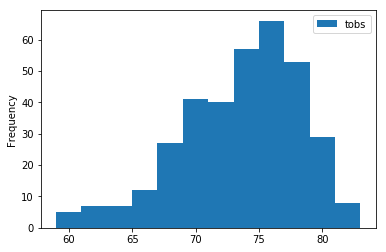

In [50]:
#PART 2 DONE: PLOT STATION ANALYSIS
measure.plot.hist(bins=12)
plt.show()